<a href="https://colab.research.google.com/github/Basit2612/Deep-Learning-with-Pytorch/blob/main/01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

# Data Preparing & Loading

In [ ]:
weights = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(1)
y = weights * X + bias

print(X[:10], y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Building a PyTorch model

## Linear Regression Model

In [ ]:
random_tensor_normal = torch.randn(2, 3)
print("Random tensor (normal distribution):\n", random_tensor_normal)
torch.mean(random_tensor_normal), random_tensor_normal.mean()

Random tensor (normal distribution):
 tensor([[-0.1211,  1.9173, -0.9790],
        [-0.7811, -0.7694, -0.7432]])


(tensor(-0.2461), tensor(-0.2461))

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

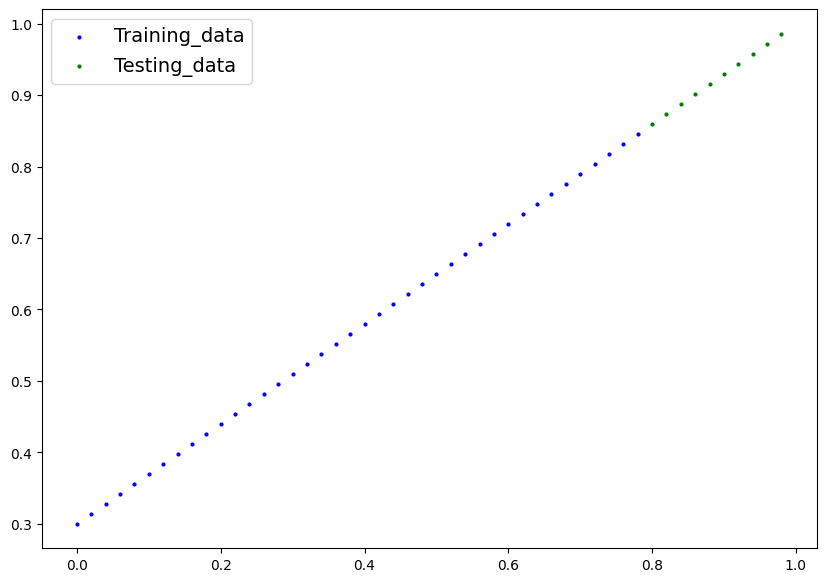

In [ ]:
def predictions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train, color="b", s=4, label="Training_data")
  plt.scatter(X_test, y_test, c="g", s=4, label="Testing_data")

  if prediction is not None:
    plt.scatter(X_test, prediction, c="r", s=4, label="Prediction")

  plt.legend(prop={"size":14})
  plt.show

predictions()

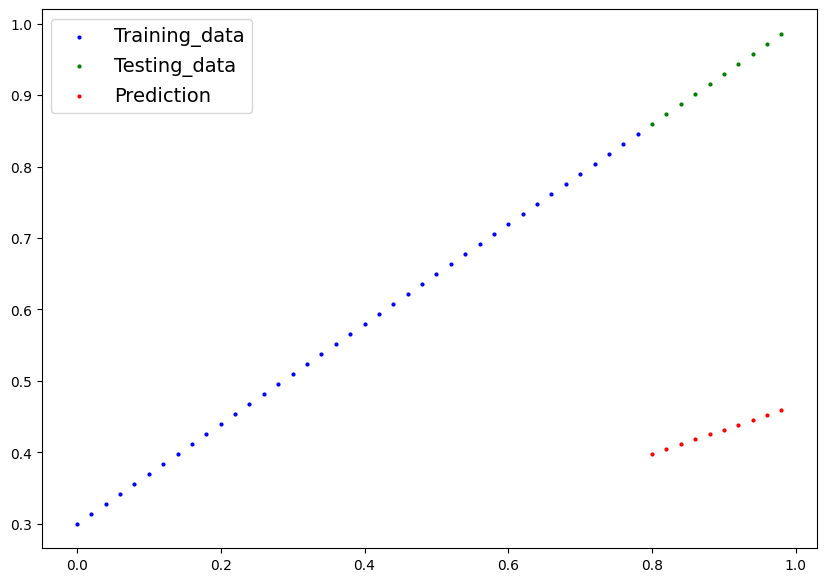

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

predictions(prediction=y_preds)

In [ ]:
with torch.no_grad():
  Y_preds=model_0(X_test)

Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_preds == Y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

# Training Model

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
MAE_loss = torch.mean(torch.abs(y_test-y_preds))
MAE_loss

tensor(0.4945)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01)

In [ ]:
epochs = 200

#Track different Values
epoch_count =[]
loss_count =[]
test_loss_count = []

for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  #Calculate the bias
  loss = loss_fn(y_pred, y_train)

  #Optimizer
  optimizer.zero_grad()

  #Backpropagation
  loss.backward()

  #OPtimizer
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_count.append(loss)
    test_loss_count.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} |Test Loss: {test_loss}")

    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 |Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 |Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 |Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 |Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 |Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 |Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 |Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

For regression problem (like ours) a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice

But for problem like classifying whether a photo of a cat or dog , you'll likely want to use a loss function nn.BCELoss() (Binarycross entropy loss)

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]),
 None)

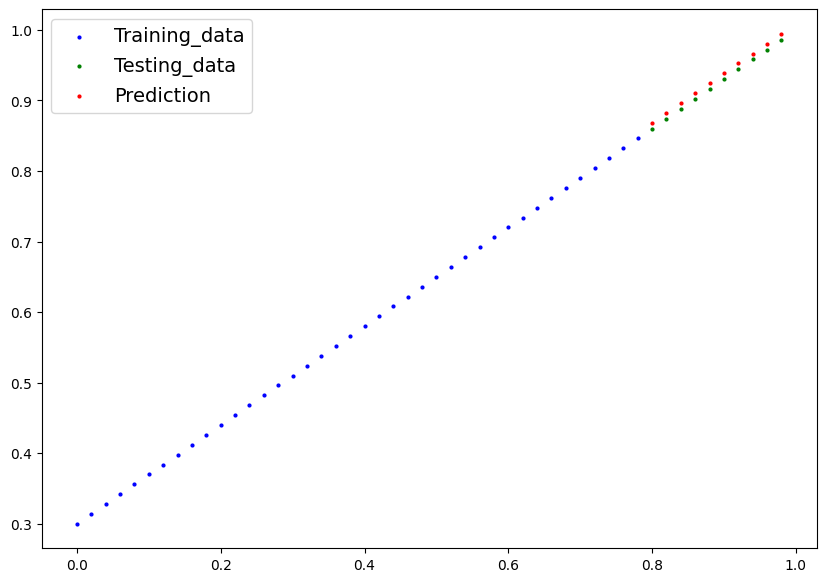

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, predictions(prediction=y_preds)

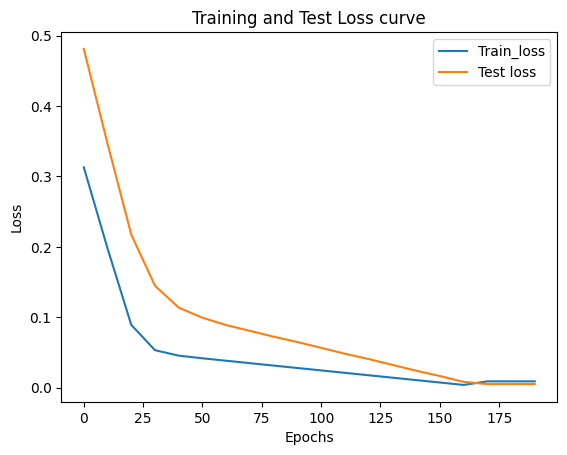

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_count).cpu().numpy(), label="Train_loss")
plt.plot(epoch_count, test_loss_count, label="Test loss")
plt.title("Training and Test Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Three main methods:

1. "torch.save()" - allows you to save a PyTorch object in Python Pickle format
2. "torch.load()" - allows you load a saved PyTorch object
3. "torch.nn.Module.load_state_dict()" - this allows to load a model's saved state dictionary

# Saving a Model in Pytorch

In [ ]:
# Saving our Pytorch Model
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok=True)

#Create models Save Path
MODEL_NAME ="01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#Save the model state dict
print(f"SAVING MODEL TO: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

SAVING MODEL TO: models/01_pytorch_workflow_model_0.pth


In [ ]:
model_0

LinearRegressionModel()

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May  8 14:06 01_pytorch_workflow_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

# Loading a PyTorch Model

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make Some Predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

Steps of a model:

1. Get Data Ready(turn into tensors):
  torchvision.transforms
  torch.utils.data.Dataset
  torch.utils.data.DataLoader

2. Build or pick a pretrained model(to suit your problem)  (Build a training loop)
  
  Loss Function - torch.nn, torch.nn.Module, torchvision.models
  
  Optimizer - torch.optim

3. Fit the model to the data and make a prediction

4. Evaluate the model - torchmetrics

5. Improve through experimentation - torch.utils.tensorboard

6. Save and load your trained model

# Putting it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.2.1+cu121'

In [ ]:
# Create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
weights = 0.7
bias = 0.3

#Create range values

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
Y = weights * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

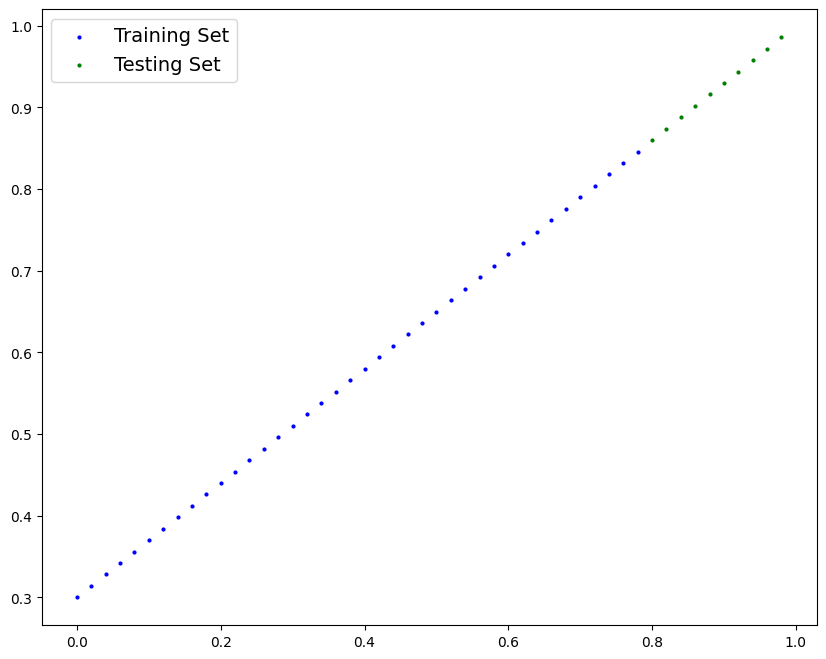

In [ ]:
#Plot the Graph
def predictions(X_train=X_train,
                X_test=X_test,
                Y_train=Y_train,
                Y_test=Y_test,
                prediction=None):
  plt.figure(figsize=(10,8))
  plt.scatter(X_train, Y_train, label="Training Set", c="b", s=4)
  plt.scatter(X_test, Y_test, label="Testing Set", c="g", s=4)
  if prediction is not None:
    plt.scatter(X_test, prediction, label="Prediction", s=4, c="r")
  plt.legend(prop={"size":14})
  plt.show

predictions()

In [ ]:
from torch import nn

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Training_code:

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
print(model_1.parameters())

<generator object Module.parameters at 0x7fc199ee86d0>


In [ ]:
# Setup Loss Function
loss_fn = nn.L1Loss(model_1)

# Setup Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
torch.manual_seed(42)

In [ ]:
epochs = 200
epoch_count = []
loss_count = []
test_loss_count = []
for epoch in range(epochs):
  # Training Model
  model_1.train()

  #  Forward Pass
  y_pred = model_1(X_train)

  #Loss function
  loss = loss_fn(y_pred, Y_train)

  #Optimizer Zero grad
  optimizer.zero_grad()

  # Loss Backward Propagation
  loss.backward()

  #Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, Y_test)

  # Visualization
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_count.append(loss)
    test_loss_count.append(test_loss)
    print(f"Epoch: {epoch} | Loss:{loss} | test loss:{test_loss}")

Epoch: 0 | Loss:0.5551779866218567 | test loss:0.5739762187004089
Epoch: 10 | Loss:0.4399680495262146 | test loss:0.4392663538455963
Epoch: 20 | Loss:0.3247582018375397 | test loss:0.30455657839775085
Epoch: 30 | Loss:0.20954827964305878 | test loss:0.16984674334526062
Epoch: 40 | Loss:0.09433844685554504 | test loss:0.03513689711689949
Epoch: 50 | Loss:0.023886386305093765 | test loss:0.04784906655550003
Epoch: 60 | Loss:0.0199567973613739 | test loss:0.04580312222242355
Epoch: 70 | Loss:0.016517987474799156 | test loss:0.0375305712223053
Epoch: 80 | Loss:0.013089170679450035 | test loss:0.029944902285933495
Epoch: 90 | Loss:0.009653178043663502 | test loss:0.02167237363755703
Epoch: 100 | Loss:0.006215679459273815 | test loss:0.014086711220443249
Epoch: 110 | Loss:0.002787243574857712 | test loss:0.005814164876937866
Epoch: 120 | Loss:0.0012645035749301314 | test loss:0.013801807537674904
Epoch: 130 | Loss:0.0012645035749301314 | test loss:0.013801807537674904
Epoch: 140 | Loss:0.001

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weights, bias, epoch, loss, test_loss

(0.7, 0.3, 199, tensor(0.0103, grad_fn=<MeanBackward0>), tensor(0.0003))

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

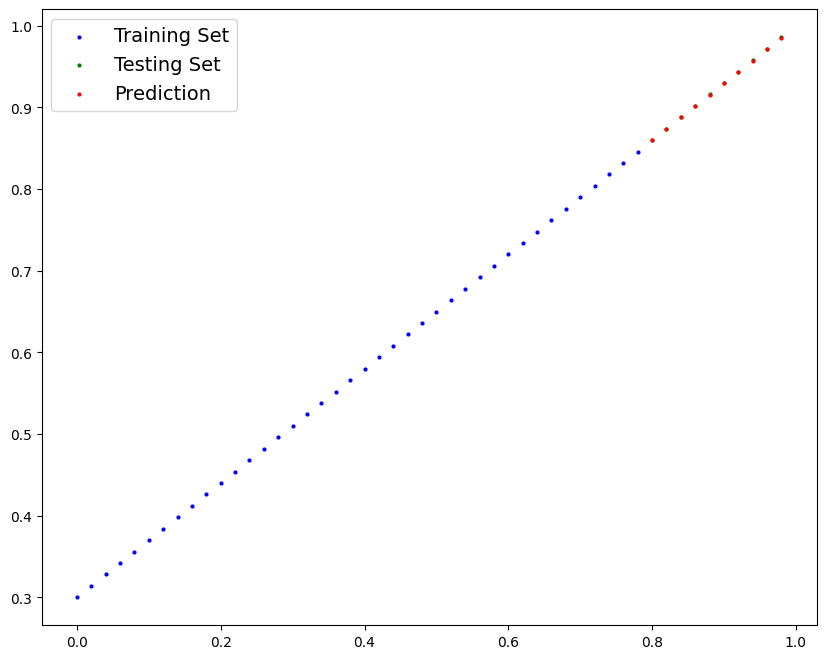

In [ ]:
predictions(prediction=y_preds)

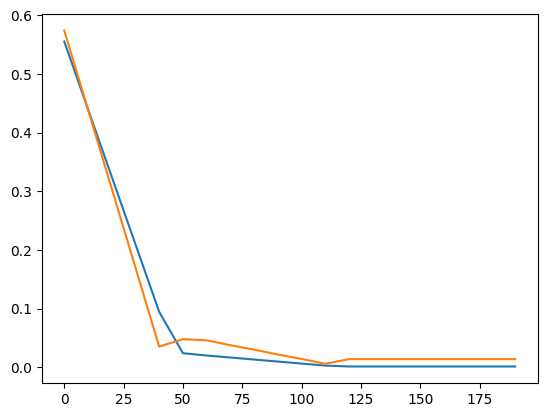

In [ ]:
#Plot predictions:
plt.plot(epoch_count,torch.tensor(loss_count).cpu().numpy(), label="Training_loss")
plt.plot(epoch_count, test_loss_count, label="Testing_loss")
plt.show()

In [ ]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents= True, exist_ok = True)
model_name = "01_pytorch_workflow_model_1.pth"

model_Save = model_path / model_name

print(f"Saving model to:{model_Save}")
torch.save(obj=model_1.state_dict(),
           f=model_Save)

Saving model to:models/01_pytorch_workflow_model_1.pth


In [ ]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(model_Save))


<All keys matched successfully>

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])